In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import ListedColormap

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

sc.settings.n_jobs = 40
sc.set_figure_params(figsize=(4,4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [4]:
adata = sc.read_h5ad("Output_230910_adata_scvi_random_sampleID_annot.h5ad") # 100 Gb, 10m

In [5]:
adata

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0', 'cluster_main2', 'Brain_Region2', 'Brain_Region3', 'Brain_Region_Unit'
    uns: 'Brain_Region3_colors', 'Stage2_colors', 'cluster_main2_colors', 'leiden_scvi_colors', 'log1p'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts', 'scaled'

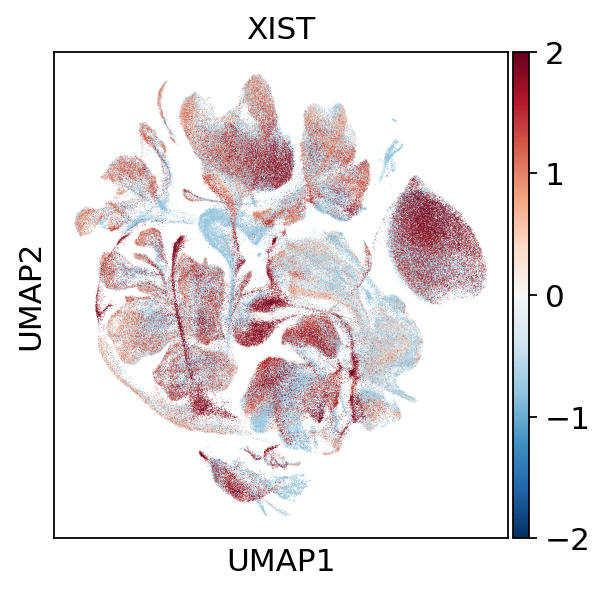

In [7]:
sc.pl.umap(adata, color = "XIST", cmap='RdBu_r', layer = "scaled", vmin = -2, vmax = 2, 
           legend_loc='on data', legend_fontsize=5)

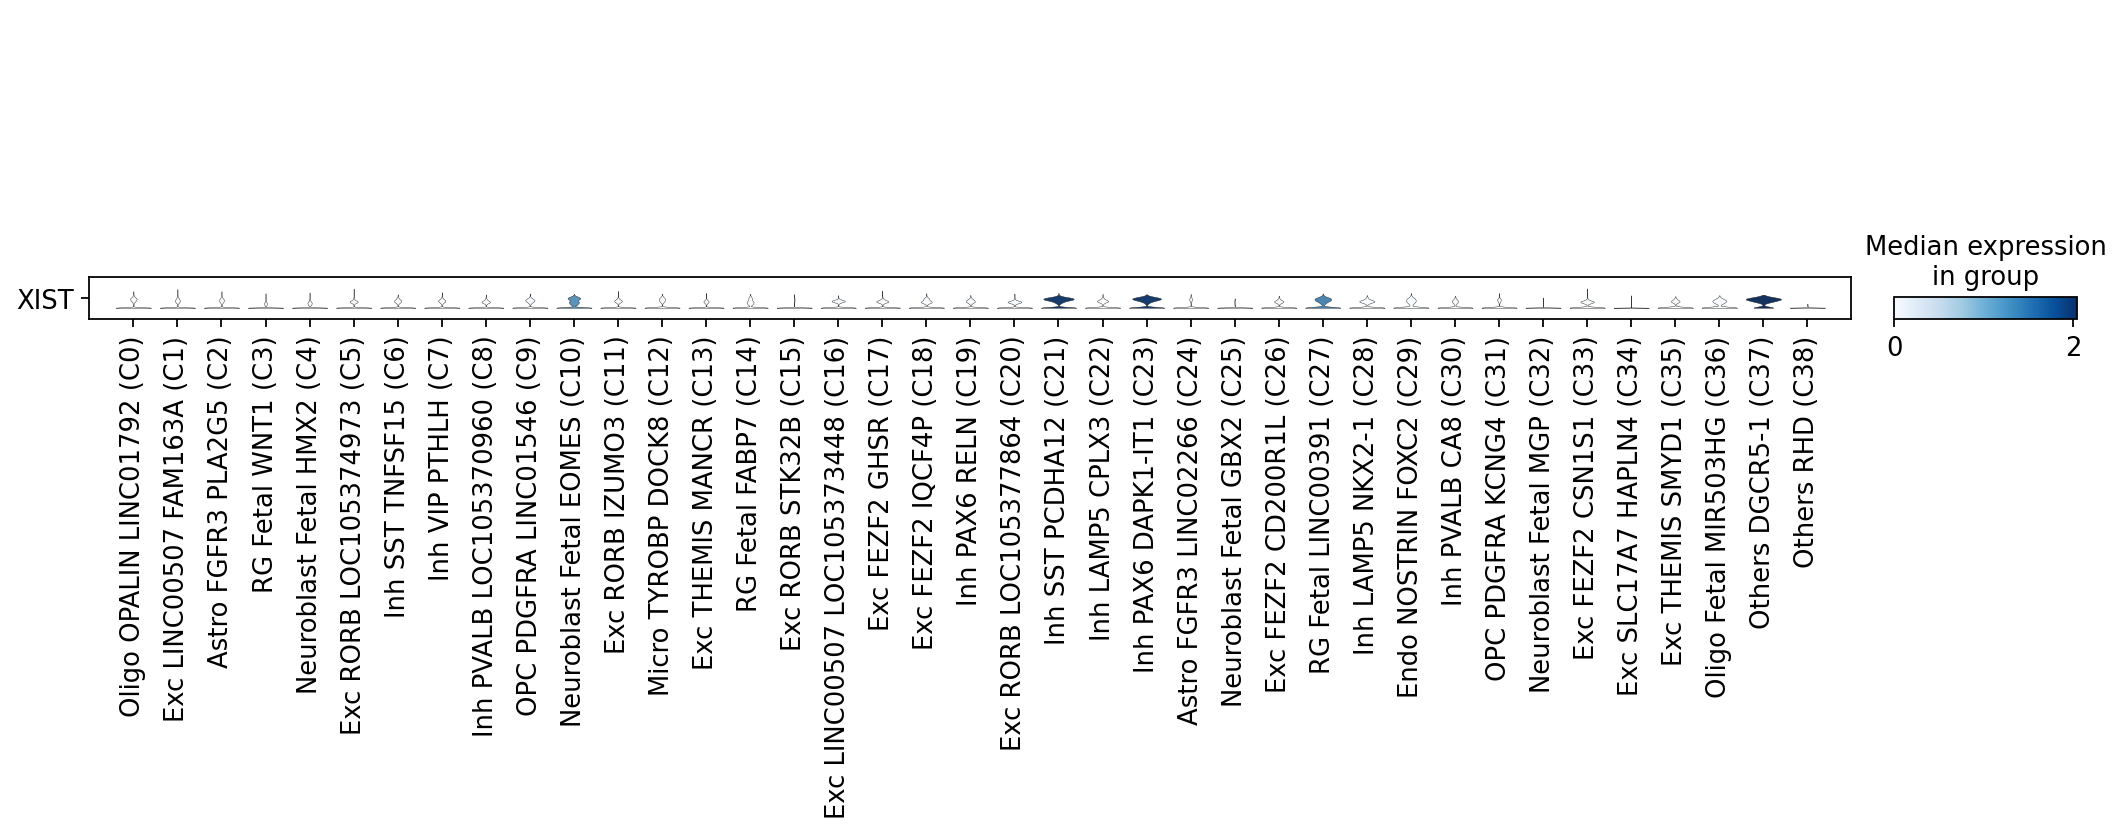

In [9]:
ax = sc.pl.stacked_violin(adata, ["XIST"], groupby='leiden_scvi', swap_axes=True)

In [18]:
adata = adata[adata.obs["cluster_number"].isin(["C3", "C14", "C27"])]

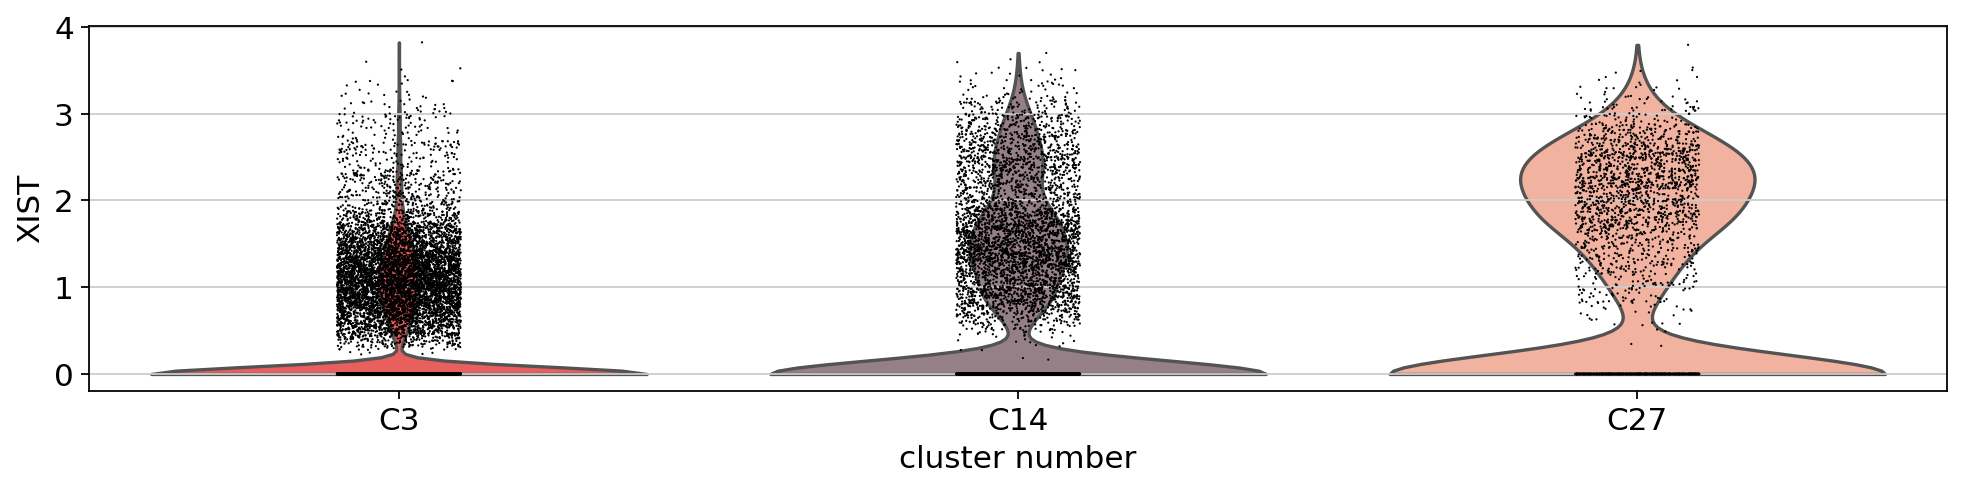

In [20]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (12, 3)}):
    sc.pl.violin(adata, ['XIST'], groupby='cluster_number' )

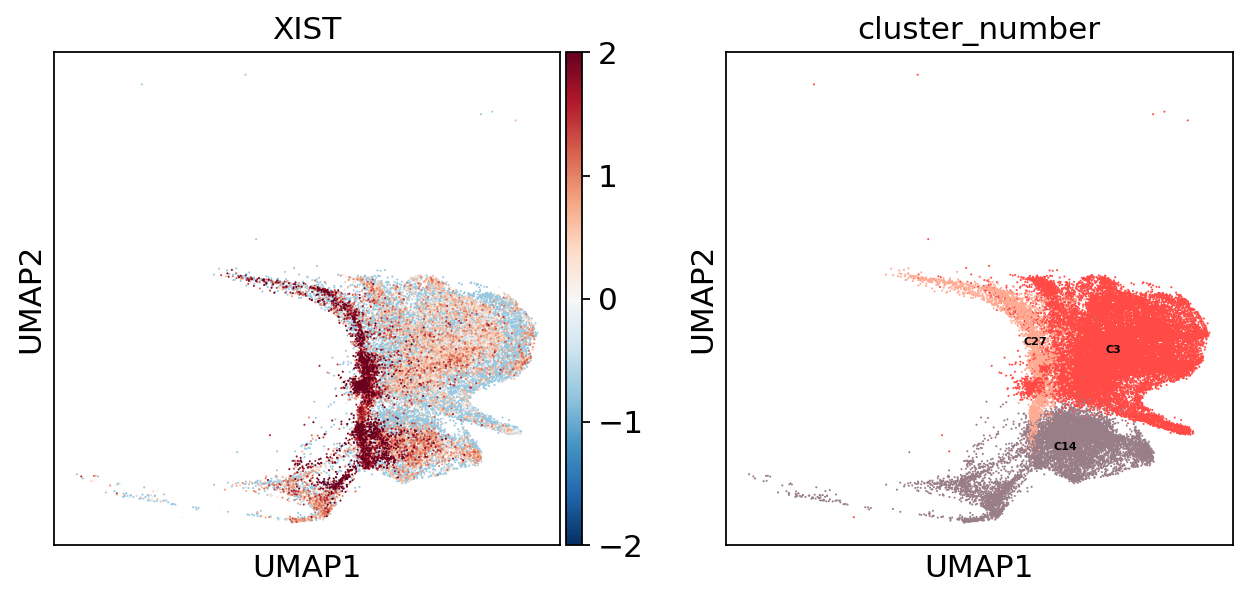

In [25]:
sc.pl.umap(adata, color = (["XIST", "cluster_number"]), cmap='RdBu_r', layer = "scaled", vmin = -2, vmax = 2, 
           legend_loc='on data', legend_fontsize=5)

In [6]:
marker_genes = ['ESR1', 'ESR2', 'PTPRD']

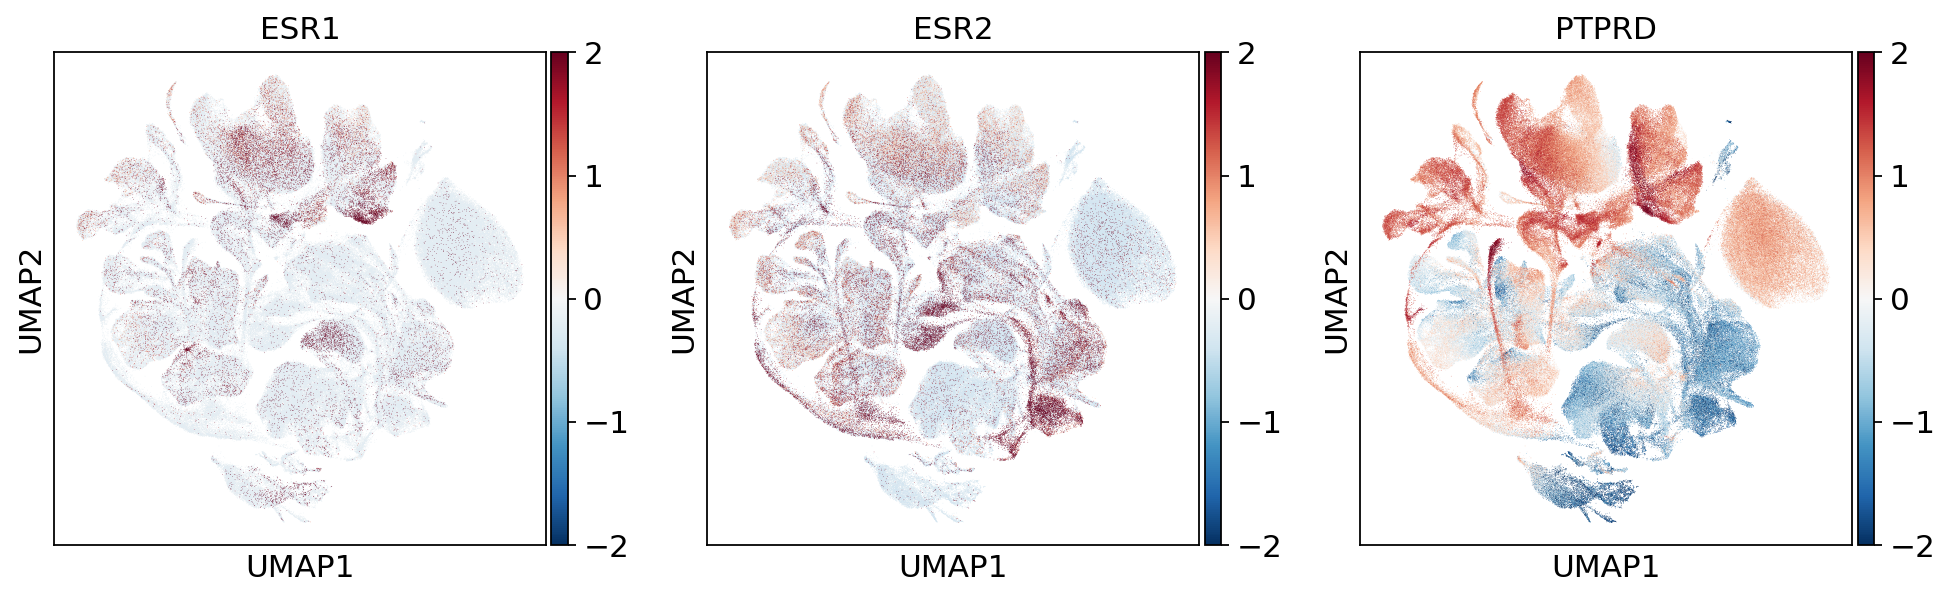

In [7]:
sc.set_figure_params(figsize=(4, 4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

sc.pl.umap(adata, color = marker_genes, cmap='RdBu_r', layer = "scaled", vmin = -2, vmax = 2, 
           legend_loc='on data', legend_fontsize=5,
           save = "umap_zscore_SexHormone.pdf")

In [9]:
adata.obs["cluster_number"] = adata.obs["leiden_scvi"].copy()
cluster_number = [
    'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 
    'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 
    'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38'
]
adata.rename_categories('cluster_number', cluster_number)

In [10]:
categories_number = [
    'C20', 'C5', 'C11', 'C15', 'C18', 'C17', 'C26', 'C33', 'C1', 'C16',
    'C13', 'C35', 'C34', 'C28', 'C22', 'C23', 'C19', 'C7', 'C30', 'C8',
    'C6', 'C21', 'C31', 'C9', 'C2', 'C24', 'C0', 'C36', 'C29', 'C12', 'C3',
    'C14', 'C27', 'C4', 'C10', 'C25', 'C32', 'C37', 'C38'
]

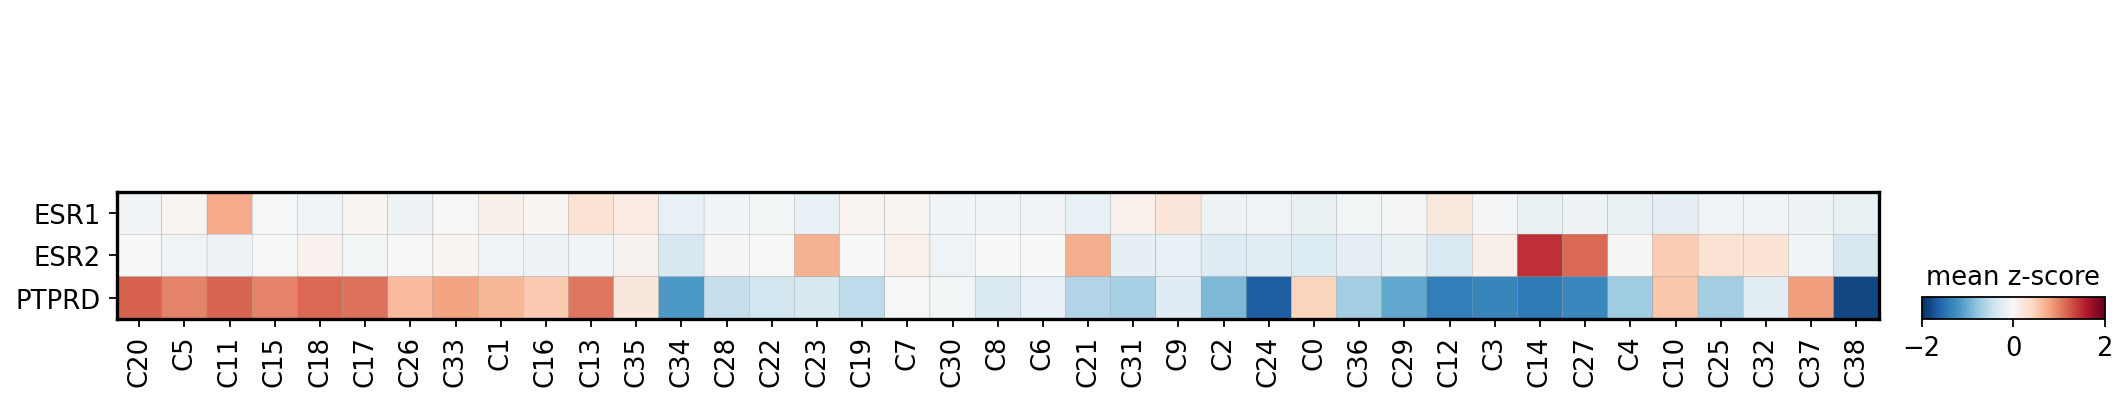

In [22]:
sc.pl.matrixplot(adata, marker_genes, groupby = 'cluster_number', dendrogram = False, cmap='RdBu_r', 
              colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, swap_axes= True, categories_order = categories_number,
             save = 'matrixplot_zscore_ClusterNumber.pdf')

In [23]:
categories_group = ['Exc RORB LOC105377864 (C20)', 
              'Exc RORB LOC105374973 (C5)', 
              'Exc RORB IZUMO3 (C11)', 
              'Exc RORB STK32B (C15)', 
              'Exc FEZF2 IQCF4P (C18)', 
              'Exc FEZF2 GHSR (C17)', 
              'Exc FEZF2 CD200R1L (C26)', 
              'Exc FEZF2 CSN1S1 (C33)', 
              'Exc LINC00507 FAM163A (C1)', 
              'Exc LINC00507 LOC105373448 (C16)', 
              'Exc THEMIS MANCR (C13)', 
              'Exc THEMIS SMYD1 (C35)', 
              'Exc SLC17A7 HAPLN4 (C34)', 
              'Inh LAMP5 NKX2-1 (C28)', 
              'Inh LAMP5 CPLX3 (C22)', 
              'Inh PAX6 DAPK1-IT1 (C23)', 
              'Inh PAX6 RELN (C19)', 
              'Inh VIP PTHLH (C7)', 
              'Inh PVALB CA8 (C30)', 
              'Inh PVALB LOC105370960 (C8)', 
              'Inh SST TNFSF15 (C6)', 
              'Inh SST PCDHA12 (C21)', 
              'OPC PDGFRA KCNG4 (C31)', 
              'OPC PDGFRA LINC01546 (C9)', 
              'Astro FGFR3 PLA2G5 (C2)', 
              'Astro FGFR3 LINC02266 (C24)', 
              'Oligo OPALIN LINC01792 (C0)', 
              'Oligo Fetal MIR503HG (C36)', 
              'Endo NOSTRIN FOXC2 (C29)', 
              'Micro TYROBP DOCK8 (C12)', 
              'RG Fetal WNT1 (C3)', 
              'RG Fetal FABP7 (C14)', 
              'RG Fetal LINC00391 (C27)', 
              'Neuroblast Fetal HMX2 (C4)', 
              'Neuroblast Fetal EOMES (C10)', 
              'Neuroblast Fetal GBX2 (C25)', 
              'Neuroblast Fetal MGP (C32)', 
              'Others DGCR5-1 (C37)', 
              'Others RHD (C38)']

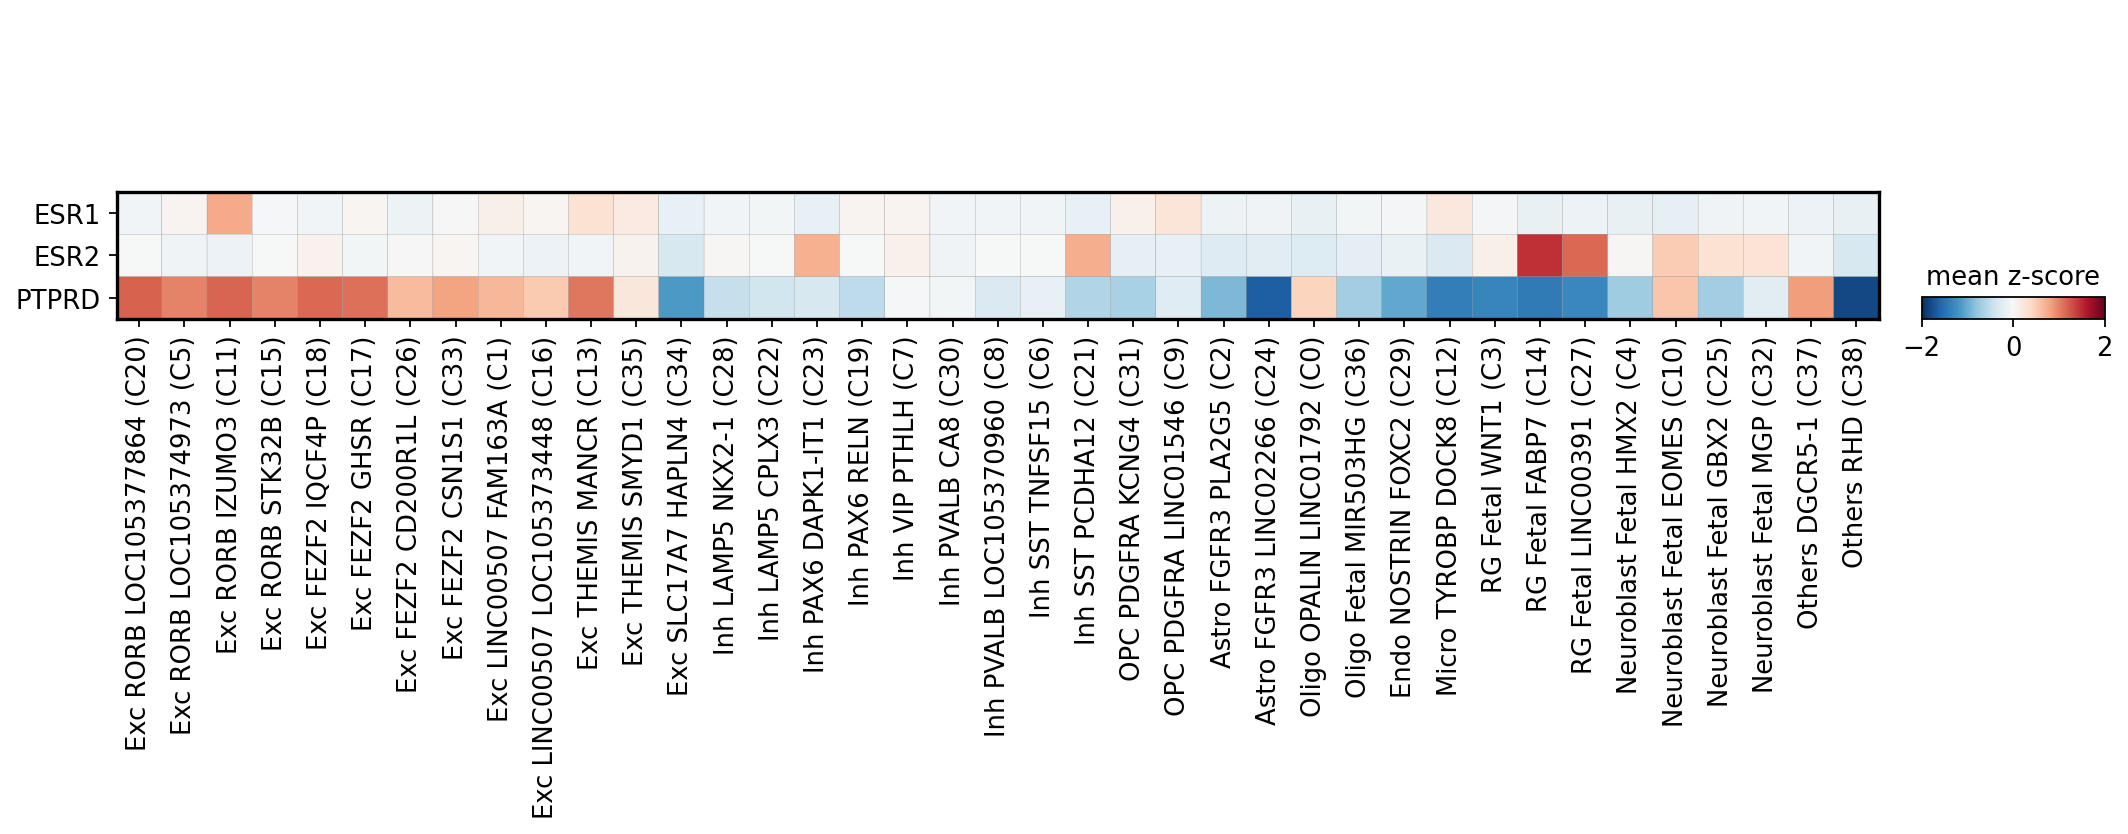

In [24]:
sc.pl.matrixplot(adata, marker_genes, groupby = 'leiden_scvi', dendrogram = False, cmap='RdBu_r', 
              colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, swap_axes= True, categories_order = categories_group,
             save = 'matrixplot_zscore_ClusterGroup.pdf')

In [25]:
adata.obs["Brain_Region_Unit"].value_counts()

Cerebral cortex        328525
Thalamus                11623
Cerebellum              10288
Forebrain                7979
Ganglionic Eminence      7637
Midbrain                 6811
Uncategorized            5888
Medulla                  5161
Pons                     2382
Hypothalamus             2303
Hindbrain                1969
Hippocampus              1596
Striatum                  898
Name: Brain_Region_Unit, dtype: int64

In [26]:
adata.obs["Stage2"].value_counts()

Adult (40-60Y)           74482
Fetal (1st trimester)    68108
Adult (60-80Y)           55500
Adult (20-40Y)           45656
Neonatal                 37254
Fetal (2nd trimester)    35183
Childhood (1-6Y)         30726
Adolescence (12-20Y)     14010
Childhood (6-12Y)        13739
Adult (>80Y)             11967
Fetal (3rd trimester)     6435
Name: Stage2, dtype: int64

In [17]:
adata.obs["Stage3"] =  adata.obs['Stage2'].astype(str)

adata.obs.loc[(adata.obs['Stage2'] == 'Childhood (1-6Y)'), 'Stage3'] = 'Adult'
adata.obs.loc[(adata.obs['Stage2'] == 'Childhood (6-12Y)'), 'Stage3'] = 'Adult'
adata.obs.loc[(adata.obs['Stage2'] == 'Adolescence (12-20Y)'), 'Stage3'] = 'Adult'
adata.obs.loc[(adata.obs['Stage2'] == 'Adult (20-40Y)'), 'Stage3'] = 'Adult'
adata.obs.loc[(adata.obs['Stage2'] == 'Adult (40-60Y)'), 'Stage3'] = 'Adult'
adata.obs.loc[(adata.obs['Stage2'] == 'Adult (60-80Y)'), 'Stage3'] = 'Adult'
adata.obs.loc[(adata.obs['Stage2'] == 'Adult (>80Y)'), 'Stage3'] = 'Adult'

adata.obs.Stage3.value_counts()

Adult                    246080
Fetal (1st trimester)     68108
Neonatal                  37254
Fetal (2nd trimester)     35183
Fetal (3rd trimester)      6435
Name: Stage3, dtype: int64

In [22]:
# Assuming adata is your DataFrame
# Replace 'cluster_number' and 'Stage3' with your actual column names
result = adata.obs[["cluster_number", "Stage3"]].value_counts()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Sort the result by 'cluster_number' in ascending order
result = result.sort_index()

# Display the full table
print(result)


cluster_number  Stage3               
C0              Adult                    52486
                Fetal (1st trimester)        1
                Fetal (2nd trimester)        1
                Neonatal                    76
C1              Adult                    36310
                Fetal (1st trimester)        2
                Fetal (2nd trimester)       17
                Fetal (3rd trimester)     1458
                Neonatal                  4942
C2              Adult                    17730
                Fetal (1st trimester)      166
                Fetal (2nd trimester)      616
                Fetal (3rd trimester)      360
                Neonatal                 10060
C3              Adult                       96
                Fetal (1st trimester)    22105
                Fetal (2nd trimester)      654
                Fetal (3rd trimester)        3
                Neonatal                    15
C4              Adult                      151
                Fetal 

In [25]:
import pandas as pd

# Assuming adata is your DataFrame
# Replace 'cluster_number' and 'Stage3' with your actual column names
result_counts = adata.obs[["cluster_number", "Stage3"]].value_counts().reset_index()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Rename the columns for clarity
result_counts.columns = ['cluster_number', 'Stage3', 'count']

# Group the data by 'cluster_number' and calculate the total count for each cluster
cluster_counts = result_counts.groupby('cluster_number')['count'].sum().reset_index()

# Merge the original counts with the total cluster counts
result_counts = result_counts.merge(cluster_counts, on='cluster_number', suffixes=('', '_total'))

# Calculate the relative proportion
result_counts['proportion'] = result_counts['count'] / result_counts['count_total']

# Display the full table
print(result_counts[['cluster_number', 'Stage3', 'proportion']])


    cluster_number                 Stage3  proportion
0               C0                  Adult    0.998516
1               C0               Neonatal    0.001446
2               C0  Fetal (2nd trimester)    0.000019
3               C0  Fetal (1st trimester)    0.000019
4               C1                  Adult    0.849774
5               C1               Neonatal    0.115659
6               C1  Fetal (3rd trimester)    0.034122
7               C1  Fetal (2nd trimester)    0.000398
8               C1  Fetal (1st trimester)    0.000047
9               C3  Fetal (1st trimester)    0.966423
10              C3  Fetal (2nd trimester)    0.028593
11              C3                  Adult    0.004197
12              C3               Neonatal    0.000656
13              C3  Fetal (3rd trimester)    0.000131
14              C4  Fetal (1st trimester)    0.945809
15              C4  Fetal (2nd trimester)    0.045823
16              C4                  Adult    0.006830
17              C4  Fetal (3

In [26]:
# Assuming adata is your DataFrame
# Replace 'cluster_number' and 'Stage3' with your actual column names
result_counts = adata.obs[["cluster_number", "Stage3"]].value_counts().reset_index()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Rename the columns for clarity
result_counts.columns = ['cluster_number', 'Stage3', 'count']

# Group the data by 'cluster_number' and calculate the total count for each cluster
cluster_counts = result_counts.groupby('cluster_number')['count'].sum().reset_index()

# Merge the original counts with the total cluster counts
result_counts = result_counts.merge(cluster_counts, on='cluster_number', suffixes=('', '_total'))

# Calculate the relative proportion
result_counts['proportion'] = result_counts['count'] / result_counts['count_total']

# Iterate through the groups and print results with newlines between clusters
previous_cluster = None
for index, row in result_counts.iterrows():
    current_cluster = row['cluster_number']
    if current_cluster != previous_cluster and previous_cluster is not None:
        print("\n")  # Add a newline between cluster_number groups
    print(f"cluster_number: {row['cluster_number']}, Stage3: {row['Stage3']}, Proportion: {row['proportion']:.4f}")
    previous_cluster = current_cluster

cluster_number: C0, Stage3: Adult, Proportion: 0.9985
cluster_number: C0, Stage3: Neonatal, Proportion: 0.0014
cluster_number: C0, Stage3: Fetal (2nd trimester), Proportion: 0.0000
cluster_number: C0, Stage3: Fetal (1st trimester), Proportion: 0.0000


cluster_number: C1, Stage3: Adult, Proportion: 0.8498
cluster_number: C1, Stage3: Neonatal, Proportion: 0.1157
cluster_number: C1, Stage3: Fetal (3rd trimester), Proportion: 0.0341
cluster_number: C1, Stage3: Fetal (2nd trimester), Proportion: 0.0004
cluster_number: C1, Stage3: Fetal (1st trimester), Proportion: 0.0000


cluster_number: C3, Stage3: Fetal (1st trimester), Proportion: 0.9664
cluster_number: C3, Stage3: Fetal (2nd trimester), Proportion: 0.0286
cluster_number: C3, Stage3: Adult, Proportion: 0.0042
cluster_number: C3, Stage3: Neonatal, Proportion: 0.0007
cluster_number: C3, Stage3: Fetal (3rd trimester), Proportion: 0.0001


cluster_number: C4, Stage3: Fetal (1st trimester), Proportion: 0.9458
cluster_number: C4, Stage3: Fet

In [27]:
# Assuming adata is your DataFrame
# Replace 'cluster_number' and 'Stage3' with your actual column names
result_counts = adata.obs[["cluster_number", "Brain_Region_Unit"]].value_counts().reset_index()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Rename the columns for clarity
result_counts.columns = ['cluster_number', 'Brain_Region_Unit', 'count']

# Group the data by 'cluster_number' and calculate the total count for each cluster
cluster_counts = result_counts.groupby('cluster_number')['count'].sum().reset_index()

# Merge the original counts with the total cluster counts
result_counts = result_counts.merge(cluster_counts, on='cluster_number', suffixes=('', '_total'))

# Calculate the relative proportion
result_counts['proportion'] = result_counts['count'] / result_counts['count_total']

# Iterate through the groups and print results with newlines between clusters
previous_cluster = None
for index, row in result_counts.iterrows():
    current_cluster = row['cluster_number']
    if current_cluster != previous_cluster and previous_cluster is not None:
        print("\n")  # Add a newline between cluster_number groups
    print(f"cluster_number: {row['cluster_number']}, Brain_Region_Unit: {row['Brain_Region_Unit']}, Proportion: {row['proportion']:.4f}")
    previous_cluster = current_cluster

cluster_number: C0, Brain_Region_Unit: Cerebral cortex, Proportion: 1.0000
cluster_number: C0, Brain_Region_Unit: Forebrain, Proportion: 0.0000


cluster_number: C1, Brain_Region_Unit: Cerebral cortex, Proportion: 0.9999
cluster_number: C1, Brain_Region_Unit: Hypothalamus, Proportion: 0.0000
cluster_number: C1, Brain_Region_Unit: Ganglionic Eminence, Proportion: 0.0000


cluster_number: C2, Brain_Region_Unit: Cerebral cortex, Proportion: 0.9936
cluster_number: C2, Brain_Region_Unit: Hindbrain, Proportion: 0.0018
cluster_number: C2, Brain_Region_Unit: Medulla, Proportion: 0.0015
cluster_number: C2, Brain_Region_Unit: Midbrain, Proportion: 0.0011
cluster_number: C2, Brain_Region_Unit: Ganglionic Eminence, Proportion: 0.0008
cluster_number: C2, Brain_Region_Unit: Forebrain, Proportion: 0.0004
cluster_number: C2, Brain_Region_Unit: Hippocampus, Proportion: 0.0002
cluster_number: C2, Brain_Region_Unit: Thalamus, Proportion: 0.0002
cluster_number: C2, Brain_Region_Unit: Cerebellum, Proportio

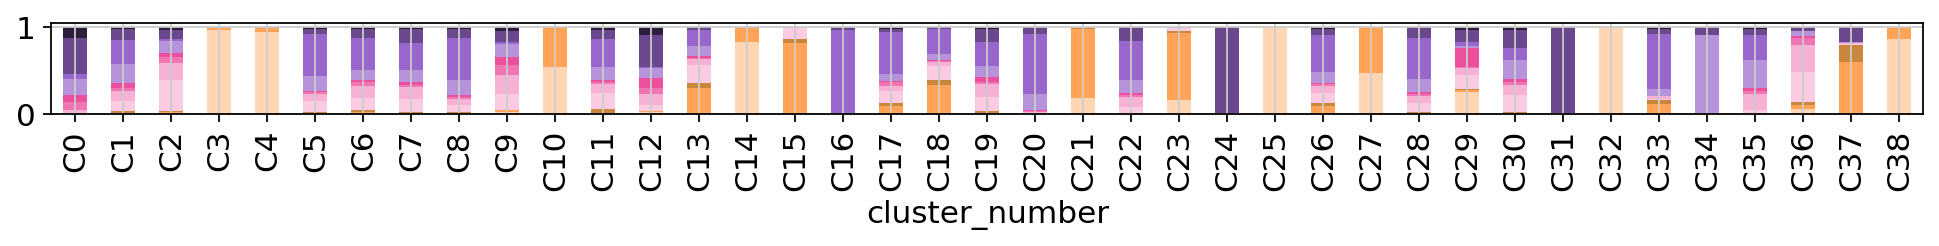

In [35]:
col_dict_age = {'Fetal (1st trimester)': '#ffd6b4',
            'Fetal (2nd trimester)': '#ffa357',
            'Fetal (3rd trimester)': '#c8873d',
            'Neonatal': '#fbcbe1',
            'Childhood (1-6Y)': '#f6b1d4',
            'Childhood (6-12Y)': '#f076b3',
            'Adolescence (12-20Y)': '#eb4f9e',
            'Adult (20-40Y)': '#b793db',
            'Adult (40-60Y)': '#9966cc',
            'Adult (60-80Y)': '#6b478e',
            'Adult (>80Y)': '#2d1e3d'}


counts = adata.obs.groupby(['cluster_number', 'Stage2']).size().reset_index(name='counts')
counts['counts'] = counts.groupby('cluster_number')['counts'].apply(lambda x: x / float(x.sum()))

fig, ax = plt.subplots(figsize=(15, 0.75))
counts.pivot(index='cluster_number', columns='Stage2', values='counts').plot(kind='bar', stacked=True, ax=ax, color=col_dict_age)

# # Remove x-label and y-label
# ax.set_xlabel('')
# ax.set_ylabel('Stage')

# # Remove legend
ax.get_legend().remove()

# plt.xticks([])  # Remove x-axis ticks
# plt.yticks([])

plt.show()


In [36]:
# https://www.color-hex.com/color-names.html
col_dict_region = {# Cortex general: Amber
    'Telencephalon': '#ffd866',
    'Telencephalon, ventral part': '#ffd866',
    'Cerebrum': '#cc9800',
    'Cerebral cortex': '#ffbf00',
    'Cortex': '#ffc519',
    'Cortex temporal': '#ffc519',
    'Cortex occipital': '#ffc519',
    'Cortex hemisphere B': '#ffc519',
    'Cortex parietal': '#ffc519',
    'Cortex entorhinal': '#ffc519',
    'Cortex hemisphere A': '#ffc519',
    'Cortical hem': '#ffc519',
    'Caudate+Putamen': '#ffc519',

    # Forebrain: Blue
    'Forebrain': '#0048ba',
    'Subcortex': '#6691d5',

    # Midbrain: Candy Apple Red
    'Midbrain': '#ff0800',
    'Midbrain dorsal': '#ff0800',
    'Midbrain ventral': '#ff0800',
    
    # Thalamus: Cambridge Blue
    'Diencephalon': '#bed3c5',
    'Thalamus': '#829a8a',
    'Hypothalamus': '#303933',
    
    # Pons and Medulla: Carolina Blue
    'Pons': '#56a0d3',
    'Medulla': '#33607e',

    # Hindbrain: light pink
    'Hindbrain': '#fbceb1',
    
    # Ganglionic Eminence: Baker-Miller Pink
    'Ganglionic Eminence': '#ff91af',
    
    # Cerebellum: Brown
    'Cerebellum': '#7C0A02',
    
    # Striatum: Cyan
    'Striatum': '#00FFFF',
    
    # Hippocampus: Cadmium Green
    'Hippocampus': '#006b3c',
    
    # DLPFC
    'Dorsolateral prefrontal cortex (BA9)': '#9966CC',
    'Frontal cortex (BA8)': '#ad84d6',
    'Anterior prefrontal cortex (BA10)': '#895bb7',
    'Dorsolateral prefrontal cortex (BA46)': '#9966cc',
    
    # Cortex (in progress...) Celtic Blue
    'Primary auditory cortex (BA41/42)': '#246bce',
    'Primary visual cortex (BA17)': '#2060b9',
    'Anterior cingulate gyrus (BA24/32/33)': '#1c55a4',
    'Middle temporal gyrus (BA21)': '#194a90',
    
    # Cerise
    'Primary somatosensory cortex, lower limb (BA3)': '#c72c59',
    'Primary somatosensory cortex, upper limb (BA3)': '#b1274f',
    
    # Cedar Chest
    'Primary motor cortex (BA4)': '#c95a49',
    'Primary motor cortex, lower limb (BA4)': '#b45141',
    'Primary motor cortex, upper limb (BA4)': '#a0483a',
    
    # Other: Black
    'Head': '#000000', 
    'Fetal Brain': '#000000',
    'Uncategorized': '#000000'
}

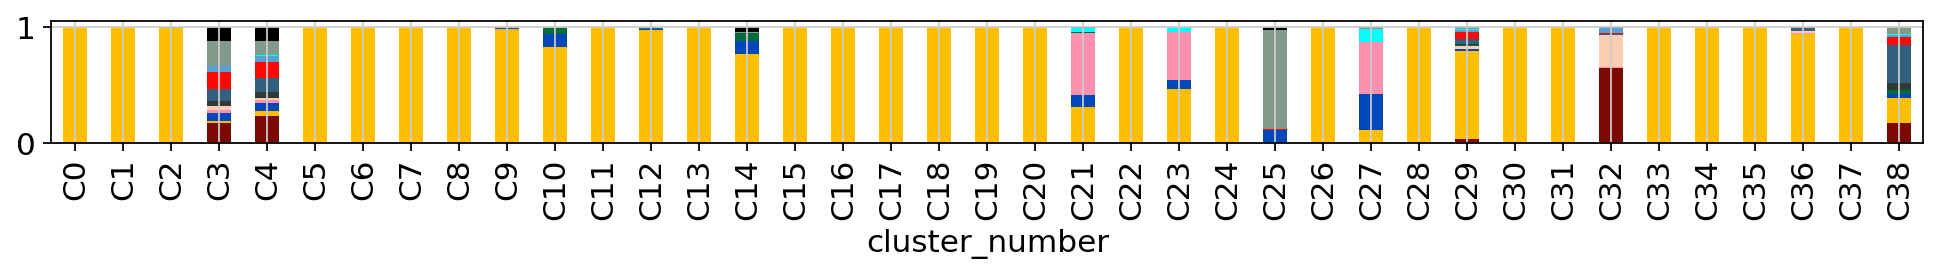

In [37]:
counts = adata.obs.groupby(['cluster_number', 'Brain_Region_Unit']).size().reset_index(name='counts')
counts['counts'] = counts.groupby('cluster_number')['counts'].apply(lambda x: x / float(x.sum()))

fig, ax = plt.subplots(figsize=(15, 1))
counts.pivot(index='cluster_number', columns='Brain_Region_Unit', values='counts').plot(kind='bar', stacked=True, ax=ax, color=col_dict_region)

# # Remove x-label and y-label
# ax.set_xlabel('')
# ax.set_ylabel('Region')

# Remove legend
ax.get_legend().remove()

# plt.xticks([])  # Remove x-axis ticks
# plt.yticks([])

plt.show()

# Archived

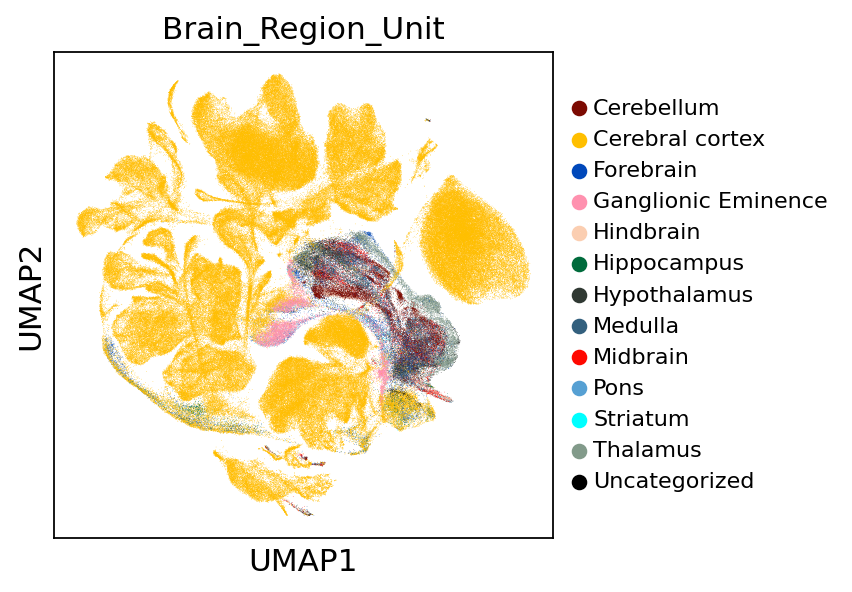

In [141]:
sc.pl.umap(adata, color='Brain_Region_Unit', palette=col_dict_region, legend_fontsize=10, save = "UMAP_Region_Unit.pdf")

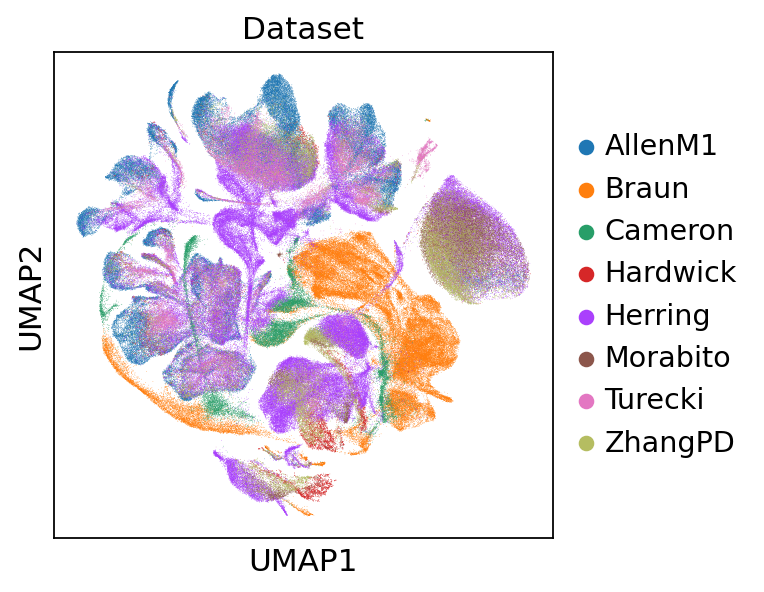

In [142]:
sc.pl.umap(adata, color=["Dataset"], save = "UMAP_Dataset.pdf")

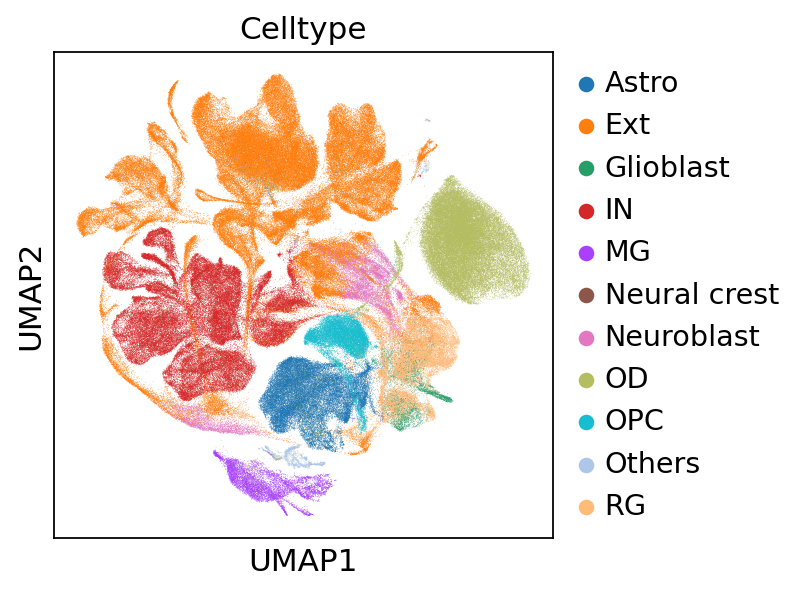

In [143]:
adata.obs["Celltype"] = adata.obs["cluster_main"].copy()
sc.pl.umap(adata, color=["Celltype"], save = "UMAP_Celltype.pdf")

In [14]:
adata.obs["cluster_number"] = adata.obs["leiden_scvi"].copy()
cluster_number = [
    'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 
    'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 
    'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38'
]
adata.rename_categories('cluster_number', cluster_number)

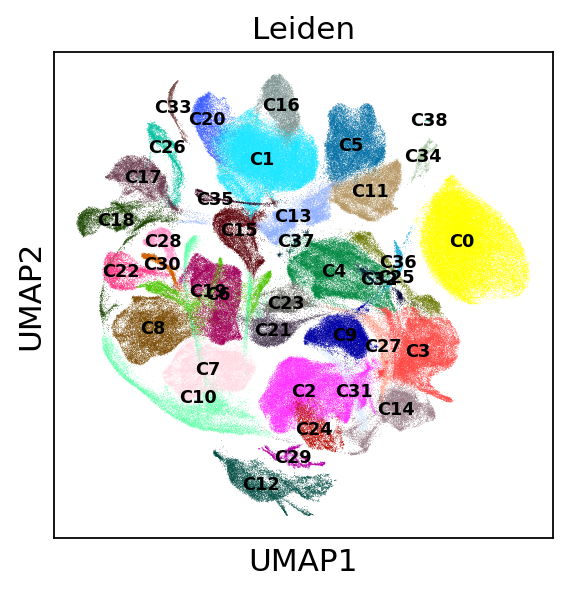

In [145]:
adata.obs["Leiden"] = adata.obs["cluster_number"]
sc.pl.umap(adata, color=["Leiden"], legend_loc='on data', legend_fontsize=8, save = "UMAP_Leiden.pdf")

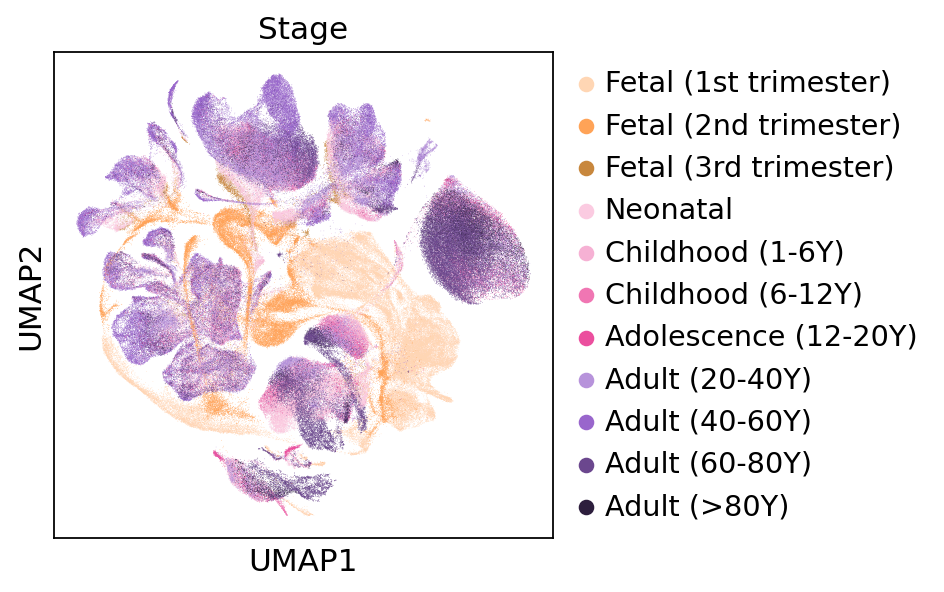

In [146]:
sc.set_figure_params(vector_friendly=True)
col_dict_stage = {'Fetal (1st trimester)': '#ffd6b4',
            'Fetal (2nd trimester)': '#ffa357',
            'Fetal (3rd trimester)': '#c8873d',
            'Neonatal': '#fbcbe1',
            'Childhood (1-6Y)': '#f6b1d4',
            'Childhood (6-12Y)': '#f076b3',
            'Adolescence (12-20Y)': '#eb4f9e',
            'Adult (20-40Y)': '#b793db',
            'Adult (40-60Y)': '#9966cc',
            'Adult (60-80Y)': '#6b478e',
            'Adult (>80Y)': '#2d1e3d'}

adata.obs['Stage'] = pd.Categorical(adata.obs['Stage2'], categories=col_dict_stage.keys(), ordered=True)

sc.pl.umap(adata, color='Stage', palette=col_dict_stage, save = "UMAP_Stage.pdf")

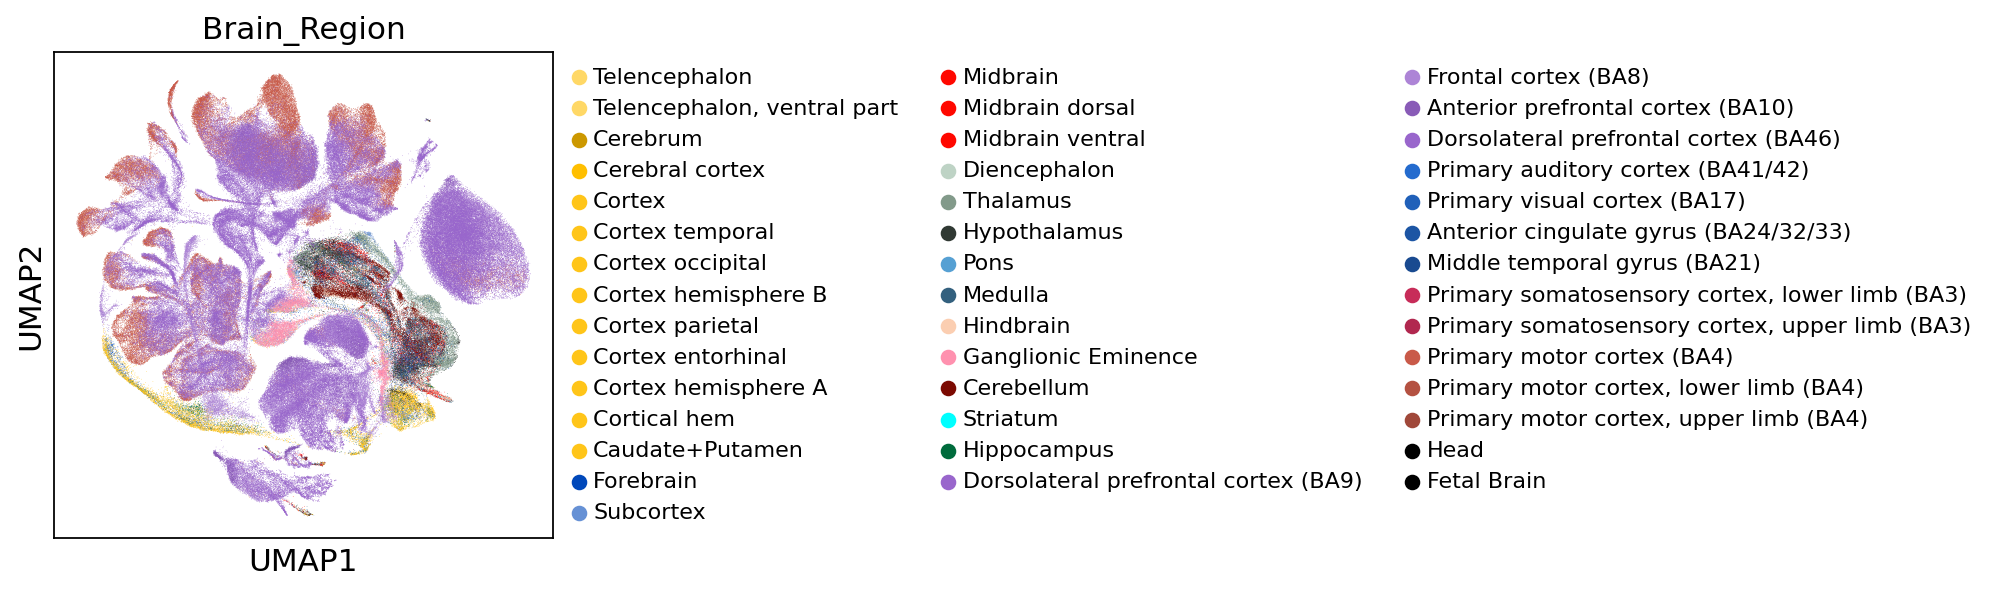

In [147]:
# https://www.color-hex.com/color-names.html
col_dict_region = {# Cortex general: Amber
    'Telencephalon': '#ffd866',
    'Telencephalon, ventral part': '#ffd866',
    'Cerebrum': '#cc9800',
    'Cerebral cortex': '#ffbf00',
    'Cortex': '#ffc519',
    'Cortex temporal': '#ffc519',
    'Cortex occipital': '#ffc519',
    'Cortex hemisphere B': '#ffc519',
    'Cortex parietal': '#ffc519',
    'Cortex entorhinal': '#ffc519',
    'Cortex hemisphere A': '#ffc519',
    'Cortical hem': '#ffc519',
    'Caudate+Putamen': '#ffc519',

    # Forebrain: Blue
    'Forebrain': '#0048ba',
    'Subcortex': '#6691d5',

    # Midbrain: Candy Apple Red
    'Midbrain': '#ff0800',
    'Midbrain dorsal': '#ff0800',
    'Midbrain ventral': '#ff0800',
    
    # Thalamus: Cambridge Blue
    'Diencephalon': '#bed3c5',
    'Thalamus': '#829a8a',
    'Hypothalamus': '#303933',
    
    # Pons and Medulla: Carolina Blue
    'Pons': '#56a0d3',
    'Medulla': '#33607e',

    # Hindbrain: light pink
    'Hindbrain': '#fbceb1',
    
    # Ganglionic Eminence: Baker-Miller Pink
    'Ganglionic Eminence': '#ff91af',
    
    # Cerebellum: Brown
    'Cerebellum': '#7C0A02',
    
    # Striatum: Cyan
    'Striatum': '#00FFFF',
    
    # Hippocampus: Cadmium Green
    'Hippocampus': '#006b3c',
    
    # DLPFC
    'Dorsolateral prefrontal cortex (BA9)': '#9966CC',
    'Frontal cortex (BA8)': '#ad84d6',
    'Anterior prefrontal cortex (BA10)': '#895bb7',
    'Dorsolateral prefrontal cortex (BA46)': '#9966cc',
    
    # Cortex (in progress...) Celtic Blue
    'Primary auditory cortex (BA41/42)': '#246bce',
    'Primary visual cortex (BA17)': '#2060b9',
    'Anterior cingulate gyrus (BA24/32/33)': '#1c55a4',
    'Middle temporal gyrus (BA21)': '#194a90',
    
    # Cerise
    'Primary somatosensory cortex, lower limb (BA3)': '#c72c59',
    'Primary somatosensory cortex, upper limb (BA3)': '#b1274f',
    
    # Cedar Chest
    'Primary motor cortex (BA4)': '#c95a49',
    'Primary motor cortex, lower limb (BA4)': '#b45141',
    'Primary motor cortex, upper limb (BA4)': '#a0483a',
    
    # Other: Black
    'Head': '#000000', 
    'Fetal Brain': '#000000',
}

adata.obs['Brain_Region'] = pd.Categorical(adata.obs['Brain_Region2'], categories=col_dict_region.keys(), ordered=True)

sc.pl.umap(adata, color='Brain_Region', palette=col_dict_region, legend_fontsize=10, save = "UMAP_Region.pdf")